In [ ]:
# Few commands to run after you import libraries
!pip install vaderSentiment
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install gensim pyLDAvis

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 

In [ ]:
# Importing Libraries
import re
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import spacy
import gensim
from gensim import corpora
from pprint import pprint
from gensim.models.ldamulticore import LdaMulticore
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import numpy as np
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# **Data Cleaning**

In [ ]:
# Data Cleaning
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text)

    return text

def tokenize_and_remove_stopwords(text):
    # Tokenize text into words
    words = text.split()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))

    # Add custom stopwords
    if custom_stopwords:
        stop_words.update(custom_stopwords)

    words = [word for word in words if word not in stop_words]

    return words

In [ ]:
# Load the text file for 2020 speech
file_path = '/content/PM_Speech(2020).txt'
with open(file_path, 'r', encoding='utf-8') as file:
    speech_text = file.read()

# Load the text file for 2021 speech
file_path2 = '/content/PM_Speech(2021).txt'
with open(file_path2, 'r', encoding='utf-8') as file:
    speech_text2 = file.read()

# List of custom stopwords to add
custom_stopwords = ['also']

# Clean the text
cleaned_speech = clean_text(speech_text)
cleaned_speech2 = clean_text(speech_text2)

# Tokenize the cleaned text
speech = tokenize_and_remove_stopwords(cleaned_speech)
speech2 = tokenize_and_remove_stopwords(cleaned_speech2)

# Print the tokenized words
print("Speech 2020:\n",speech)
print()
print("Speech 2021:\n",speech2)

Speech 2020:
 ['dear', 'countrymen', 'congratulations', 'many', 'best', 'wishes', 'countrymen', 'auspicious', 'occasion', 'independence', 'today', 'able', 'live', 'independent', 'india', 'sacrifices', 'millions', 'sons', 'daughters', 'mother', 'india', 'occasion', 'pay', 'tribute', 'freedom', 'fighters', 'martyrs', 'brave', 'souls', 'spirit', 'dedication', 'free', 'mother', 'india', 'valiant', 'soldiers', 'armed', 'forces', 'paramilitary', 'forces', 'police', 'personnel', 'security', 'forces', 'everyone', 'engaged', 'protecting', 'mother', 'india', 'engaged', 'safeguarding', 'common', 'man', 'today', 'day', 'remember', 'sacrifices', 'penance', 'sincerely', 'wholeheartedly', 'another', 'name', 'aurobindo', 'ghose', 'today', 'birth', 'anniversary', 'aurobindo', 'ghose', 'tread', 'path', 'revolutionary', 'spirituality', 'let', 'us', 'seek', 'blessings', 'fulfil', 'well', 'vision', 'passing', 'extraordinary', 'situation', 'today', 'children', 'bright', 'future', 'india', 'front', 'corona',

In [ ]:
speech_text

"My dear countrymen, Congratulations and many best wishes to all the countrymen on this auspicious occasion of independence. Today, we are able to live in an independent India because of the sacrifices of millions of sons and daughters of Mother India. This is an occasion to pay tribute to the freedom fighters, martyrs and brave souls and their spirit and dedication to free Mother India. The valiant soldiers of our armed forces, our paramilitary forces, our police personnel and our security forces- everyone is engaged in protecting Mother India. They are engaged in safeguarding the common man. Today is the day to remember their sacrifices and penance sincerely and wholeheartedly. There is another name: Aurobindo Ghose. Today is the birth anniversary of Aurobindo Ghose, who tread the path from being a revolutionary to spirituality. Let us seek his blessings so that we can fulfil his as well as our vision. We are passing through an extraordinary situation. Today, children- the bright fut

# **Top 10 Frequent Words**

In [ ]:
# List of customized words you want to exclude
customized_words = ["india","world","country","today","countrymen","dear","one","every","years"]

# Filter out customized words
filtered_speech = [word for word in speech if word not in customized_words]
filtered_speech2 = [word for word in speech2 if word not in customized_words]

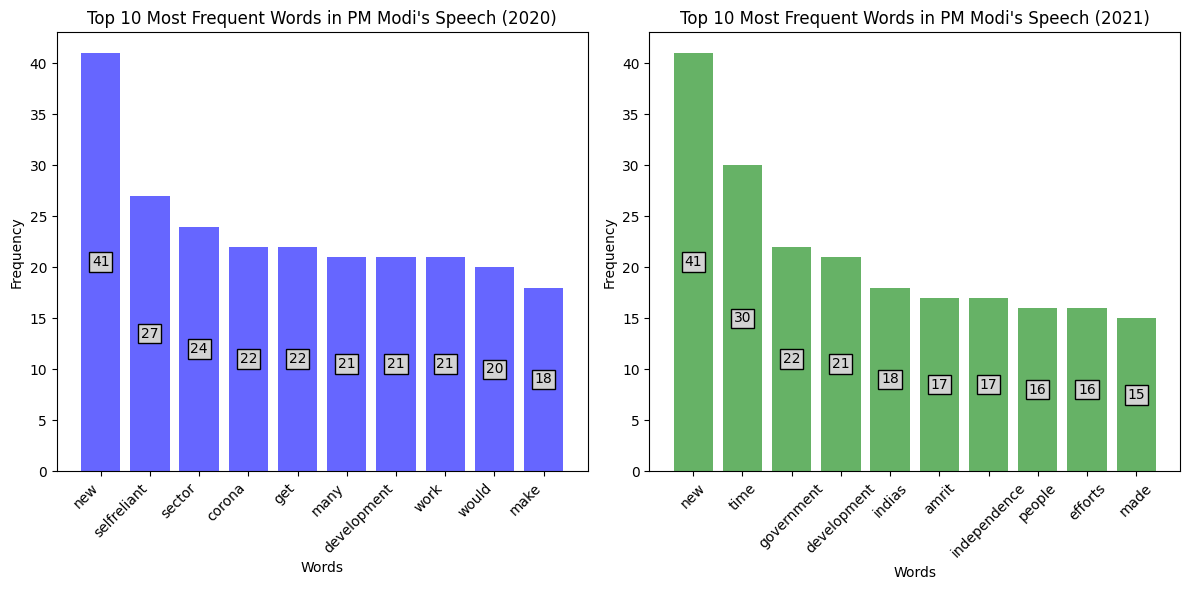

In [ ]:
# To count the number of words
word_frequency = Counter(filtered_speech)
word_frequency2 = Counter(filtered_speech2)

# Get the top 10 most frequent words
top_words = word_frequency.most_common(10)
top_words2 = word_frequency2.most_common(10)

# Extract words and their frequencies for plotting
words, frequencies = zip(*top_words)
words2, frequencies2 = zip(*top_words2)

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for 2020
axs[0].bar(words, frequencies, color='blue', alpha=0.6)
axs[0].set_xlabel('Words')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Top 10 Most Frequent Words in PM Modi\'s Speech (2020)')
axs[0].tick_params(axis='x', rotation=45)
axs[0].set_xticklabels(words, rotation=45, ha='right')

# Add data labels in a box in the middle of the bars for 2020
for i, (word, frequency) in enumerate(top_words):
    axs[0].text(i, frequency / 2, f'{frequency}', ha='center', va='center', fontsize=10,
                bbox=dict(boxstyle='square,pad=0.2', edgecolor='black', facecolor='lightgray'))

# Plot for 2021
axs[1].bar(words2, frequencies2, color='green', alpha=0.6)
axs[1].set_xlabel('Words')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Top 10 Most Frequent Words in PM Modi\'s Speech (2021)')
axs[1].tick_params(axis='x', rotation=45)

# Add data labels in a box in the middle of the bars for 2021
for i, (word, frequency) in enumerate(top_words2):
    axs[1].text(i, frequency / 2, f'{frequency}', ha='center', va='center', fontsize=10,
                bbox=dict(boxstyle='square,pad=0.2', edgecolor='black', facecolor='lightgray'))

# Adjust layout and show plots
plt.tight_layout()
plt.show()


## Wordcloud of top frequent words

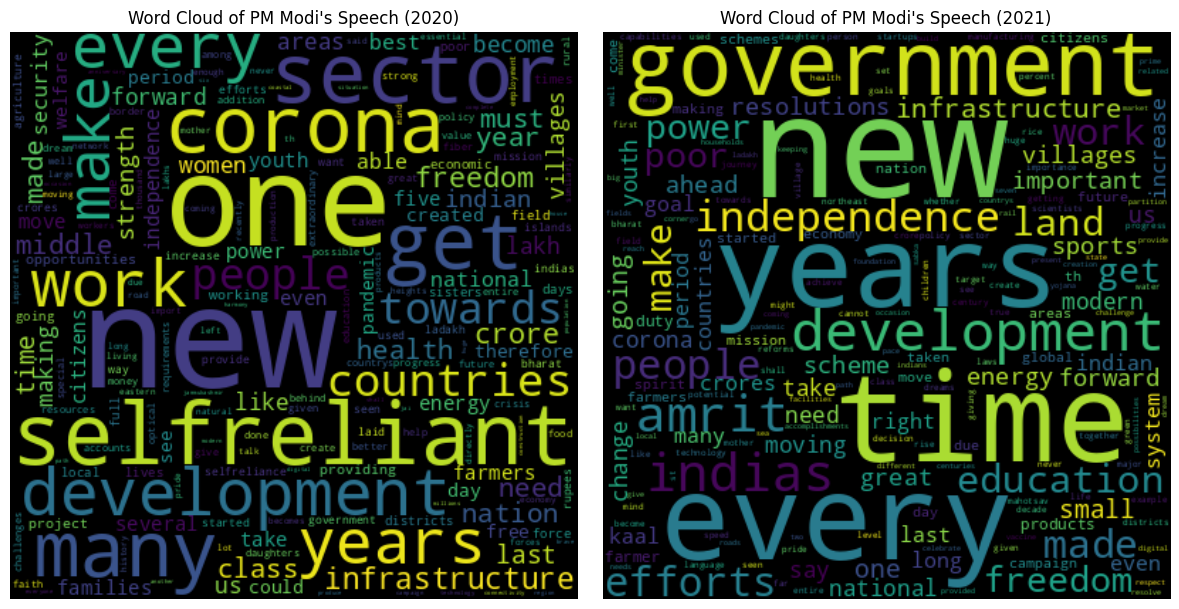

In [ ]:
# Define the words you want to exclude
exclude_words = set(['india', 'country', 'world', 'today','countrymen','dear','would'])

# Filter out excluded words from the word frequency dictionaries
filtered_word_frequency = {word: freq for word, freq in word_frequency.items() if word not in exclude_words}
filtered_word_frequency2 = {word: freq for word, freq in word_frequency2.items() if word not in exclude_words}

# Create WordCloud objects with customizations
wordcloud1 = WordCloud(width=400, height=400, background_color='black',max_font_size=100).generate_from_frequencies(filtered_word_frequency)
wordcloud2 = WordCloud(width=400, height=400, background_color='black',max_font_size=100).generate_from_frequencies(filtered_word_frequency2)

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the WordCloud for 2020
axs[0].imshow(wordcloud1, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Word Cloud of PM Modi\'s Speech (2020)')

# Plot the WordCloud for 2021
axs[1].imshow(wordcloud2, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Word Cloud of PM Modi\'s Speech (2021)')

# Adjust layout and show plots
plt.tight_layout()
plt.show()


# **Sentiment Analysis**

### Overall

In [ ]:
# For 2020

# Create a WordNetLemmatizer instance
lemmatizer = WordNetLemmatizer()

# Preprocessing function to lemmatize and remove stopwords
def preprocess(text):
    words = nltk.word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words]
    words = [word for word in words if word.lower() not in stopwords.words('english')]
    return ' '.join(words)

# Join the tokenized words back into a single string
speech_text_joined = ' '.join(filtered_speech)

# Preprocess the speech text for 2020
speech_text_joined_lemma = preprocess(speech_text_joined)


# Create a SentimentIntensityAnalyzer object
analyzer = SentimentIntensityAnalyzer()

# Perform sentiment analysis on the combined text
sentiment_scores = analyzer.polarity_scores(speech_text_joined_lemma)

# Determine the sentiment category based on the compound score
if sentiment_scores['compound'] >= 0.05:
    sentiment_category = 'Positive'
elif sentiment_scores['compound'] <= -0.05:
    sentiment_category = 'Negative'
else:
    sentiment_category = 'Neutral'

# Print the sentiment analysis results
print("Sentiment Scores:", sentiment_scores)

# Determine the sentiment category based on the highest score
max_score = max(sentiment_scores['neg'], sentiment_scores['neu'], sentiment_scores['pos'])

if max_score == sentiment_scores['neg']:
    sentiment_category = 'Negative'
elif max_score == sentiment_scores['neu']:
    sentiment_category = 'Neutral'
else:
    sentiment_category = 'Positive'

print("Overall Sentiment:", sentiment_category)


Sentiment Scores: {'neg': 0.059, 'neu': 0.677, 'pos': 0.265, 'compound': 1.0}
Overall Sentiment: Neutral


In [ ]:
# Create a pie chart for sentiment distribution 2020
labels = ['Positive', 'Negative', 'Neutral']
sizes = [sentiment_scores['pos'], sentiment_scores['neg'], sentiment_scores['neu']]
colors = ['#90EE90', '#FF6B6B', '#87CEFA']  # Light Green, Light Coral, Light Sky Blue

In [ ]:
# For 2021

# Create a SentimentIntensityAnalyzer object
analyzer = SentimentIntensityAnalyzer()

# Join the tokenized words back into a single string
speech_text_joined2 = ' '.join(filtered_speech2)

speech_text_joined2_lemma = preprocess(speech_text_joined2)

# Perform sentiment analysis on the combined text
sentiment_scores = analyzer.polarity_scores(speech_text_joined2_lemma)

# Determine the sentiment category based on the compound score
if sentiment_scores['compound'] >= 0.05:
    sentiment_category = 'Positive'
elif sentiment_scores['compound'] <= -0.05:
    sentiment_category = 'Negative'
else:
    sentiment_category = 'Neutral'

# Print the sentiment analysis results
print("Sentiment Scores:", sentiment_scores)

# Determine the sentiment category based on the highest score
max_score = max(sentiment_scores['neg'], sentiment_scores['neu'], sentiment_scores['pos'])

if max_score == sentiment_scores['neg']:
    sentiment_category = 'Negative'
elif max_score == sentiment_scores['neu']:
    sentiment_category = 'Neutral'
else:
    sentiment_category = 'Positive'

print("Overall Sentiment:", sentiment_category)

Sentiment Scores: {'neg': 0.06, 'neu': 0.689, 'pos': 0.251, 'compound': 1.0}
Overall Sentiment: Neutral


## Pie Chart Distribution of sentiments

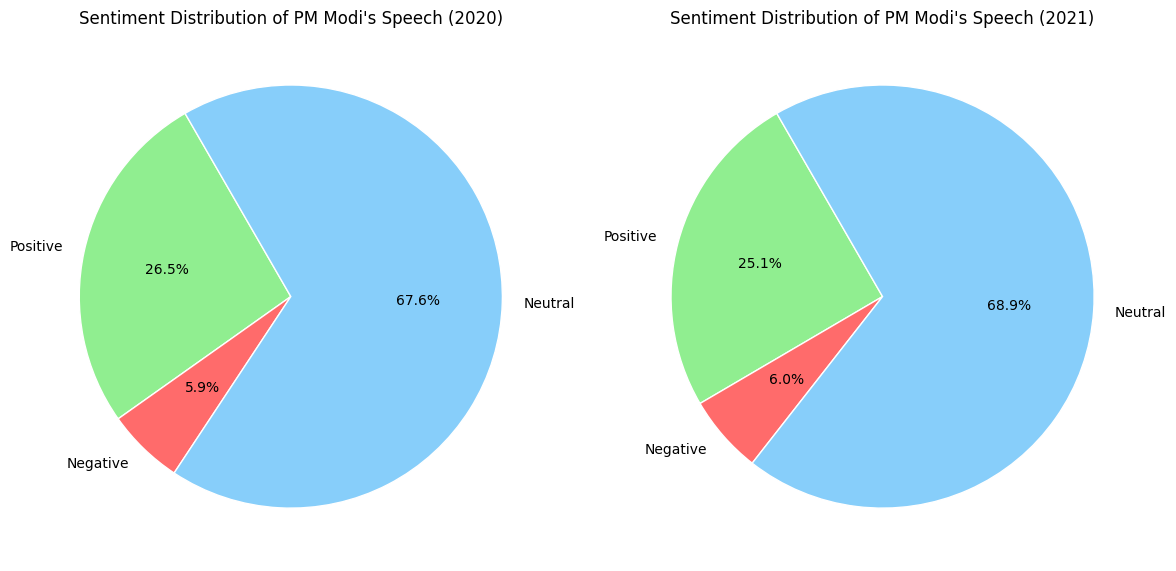

In [ ]:
# Create subplots with 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(12, 6))


# Create a pie chart for sentiment distribution 2021
sizes2 = [sentiment_scores['pos'], sentiment_scores['neg'], sentiment_scores['neu']]

ax[0].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=120, wedgeprops={'edgecolor': 'white'})
ax[0].set_title('Sentiment Distribution of PM Modi\'s Speech (2020)')
ax[1].pie(sizes2, labels=labels, colors=colors, autopct='%1.1f%%', startangle=120, wedgeprops={'edgecolor': 'white'})
ax[1].set_title('Sentiment Distribution of PM Modi\'s Speech (2021)')

# Equal aspect ratio ensures that pie is drawn as a circle
axs[0].axis('equal')
axs[1].axis('equal')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

### Analyzing negative sentiments

Identifying negative words

In [ ]:
# Identify negative words for 2020
negative_words = [word for word in speech if analyzer.polarity_scores(word)['compound'] < -0.5]
print("Negative Words:", negative_words)

Negative Words: ['crisis', 'slavery', 'slavery', 'war', 'ruin', 'slavery', 'wars', 'destructive', 'war', 'war', 'died', 'havoc', 'poorest', 'crisis', 'crisis', 'poverty', 'poverty', 'threat', 'crisis', 'crisis', 'terrorism', 'crisis', 'assault', 'disaster']


In [ ]:
"""for word in speech:
  if analyzer.polarity_scores(word)['compound'] < -0.5:
    print(word)"""

"for word in speech:\n  if analyzer.polarity_scores(word)['compound'] < -0.5:\n    print(word)"

In [ ]:
# Identify negative words for 2021
negative_words2 = [word for word in speech2 if analyzer.polarity_scores(word)['compound'] < -0.5]
print(negative_words2)

['pain', 'slavery', 'pain', 'horrors', 'torturous', 'horrors', 'crisis', 'pain', 'alarmingly', 'dearth', 'poverty', 'poverty', 'war', 'poverty', 'war', 'terrorism']


Extracting relevant sentences containing negative words

In [ ]:
# Extract relevant sentences containing negative words for saving later into a csv file (2020)
negative_sentences = []
for sentence in speech_text.split('.'):
    if any(negative_word in sentence for negative_word in negative_words):
        negative_sentences.append(sentence)

In [ ]:
# Display relevant sentences and save to CSV (2020)
print("Relevant Sentences for 2020:\n")
for i, sentence in enumerate(negative_sentences, start=1):
    print(f"{i}. {sentence.strip()}")
    print("-" * 80)

Relevant Sentences for 2020:

1. In this period of corona, I salute millions of corona warriors- doctors, nurses, sanitation workers, ambulance drivers and so on-who all should I count
--------------------------------------------------------------------------------
2. I salute all the corona warriors, who for a long time have adhered to the mantra of ‘ ’ i
--------------------------------------------------------------------------------
3. And the nation stands in solidarity with the state governments in these days of crisis
--------------------------------------------------------------------------------
4. We should never forget that during this long and dark ages of slavery, not even a moment was lost when they were not moved by the desire for freedom
--------------------------------------------------------------------------------
5. There insn't a countryman who did not put his best foot forward aspiring to break free the nation from the shackles of slavery, by waging a war and makin

In [ ]:
# Extract relevant sentences containing negative words for saving later into a csv file (2021)
negative_sentences2 = []
for sentence in speech_text2.split('.'):
    if any(negative_word2 in sentence for negative_word2 in negative_words2):
        negative_sentences2.append(sentence)

In [ ]:
# Display relevant sentences and save to CSV (2021)
print("Relevant Sentences for 2021:\n")
for i, sentence in enumerate(negative_sentences2, start=1):
    print(f"{i}. {sentence.strip()}")
    print("-" * 80)

Relevant Sentences for 2021:

1. I salute countless people from every corner of India whose names don’t even figure in history, but who have built this nation and have also taken it forward in every period
--------------------------------------------------------------------------------
2. This country never gave up the pain of slavery and the longing for freedom for centuries
--------------------------------------------------------------------------------
3. Today is the time to bow down to the leaders of all these struggles, the warriors of centuries of struggle and they also deserve our reverence
--------------------------------------------------------------------------------
4. My dear countrymen, While we celebrate our freedom today, we cannot forget the pain of partition that still pierces through the heart of all Indians
--------------------------------------------------------------------------------
5. Those who were subjected to inhuman circumstances, suffered torturous treatme

Saving the negative sentence file in csv format

In [ ]:
csv_filename_2020 = "negative_sentences_of_speech_2020.csv"
with open(csv_filename_2020, "w") as csv_file_2020:
    csv_file_2020.write("Index,Relevant Sentence\n")
    for i, sentence in enumerate(negative_sentences, start=1):
        csv_file_2020.write(f"{i},\"{sentence.strip()}\"\n")

print(f"Relevant sentences saved to {csv_filename_2020}")

Relevant sentences saved to negative_sentences_of_speech_2020.csv


In [ ]:
csv_filename_2021 = "negative_sentences_of_speech_2021.csv"
with open(csv_filename_2021, "w") as csv_file_2021:
    csv_file_2021.write("Index,Relevant Sentence\n")
    for i, sentence in enumerate(negative_sentences2, start=1):
        csv_file_2021.write(f"{i},\"{sentence.strip()}\"\n")

print(f"Relevant sentences saved to {csv_filename_2021}")

Relevant sentences saved to negative_sentences_of_speech_2021.csv


### Analyzing positive sentiments

Identifying positive words

In [ ]:
# Identify positive words (2020)
positive_words = [word for word in speech if analyzer.polarity_scores(word)['compound'] > 0.5]
print(set(positive_words))

{'win', 'celebrate', 'strong', 'freedom', 'wonderful', 'greatest', 'proudly', 'pleasure', 'excellence', 'happy', 'congratulations', 'glory', 'supreme', 'peace', 'successful', 'brave', 'revered', 'great', 'gain', 'inspiration', 'talented', 'confidence', 'praise', 'excellent', 'amazing', 'best', 'appreciated', 'grandeur', 'rich', 'justice', 'wisdom', 'magnificent', 'trust', 'blessed', 'free', 'blessings', 'celebrating'}


In [ ]:
# Identify positive words (2021)
positive_words2 = [word for word in speech2 if analyzer.polarity_scores(word)['compound'] > 0.5]
print(set(positive_words2))

{'win', 'celebrate', 'strong', 'freedom', 'heroes', 'proudly', 'heart', 'celebrated', 'delighted', 'vibrant', 'love', 'happy', 'encourage', 'glory', 'peace', 'brave', 'revered', 'great', 'inspiration', 'kind', 'confidence', 'inspire', 'winning', 'successes', 'praise', 'precious', 'magnificence', 'best', 'appreciated', 'rich', 'justice', 'honour', 'hearts', 'happiness', 'earnest', 'trust', 'perfection', 'free', 'blessings', 'enthusiastically', 'celebrating', 'visionary', 'success'}


Extracting relevant sentences containing positive words

In [ ]:
# Extracting relevant sentences containing positive words for saving later into a csv file (2020)
positive_sentences = []
for sentence in speech_text.split('.'):
    if any(positive_word in sentence for positive_word in positive_words):
        positive_sentences.append(sentence)

# Display relevant sentences (2020)
print("Relevant Sentences for 2020:\n")
for i, sentence in enumerate(positive_sentences, start=1):
    print(f"{i}. {sentence.strip()}")
    print("-" * 80)

Relevant Sentences for 2020:

1. My dear countrymen, Congratulations and many best wishes to all the countrymen on this auspicious occasion of independence
--------------------------------------------------------------------------------
2. This is an occasion to pay tribute to the freedom fighters, martyrs and brave souls and their spirit and dedication to free Mother India
--------------------------------------------------------------------------------
3. Let us seek his blessings so that we can fulfil his as well as our vision
--------------------------------------------------------------------------------
4. service is the best religion and have served the children of Mother India with complete dedication
--------------------------------------------------------------------------------
5. I express my condolences to all such families, and I believe the indomitable will power and determination of 130 crore countrymen will make us win over Corona and we shall definitely win
-----------

In [ ]:
# Extracting relevant sentences containing positive words for saving later into a csv file (2021)
positive_sentences2 = []
for sentence in speech_text2.split('.'):
    if any(positive_word in sentence for positive_word in positive_words):
        positive_sentences2.append(sentence)

# Display relevant sentences (2021)
print("Relevant Sentences for 2021:\n")
for i, sentence in enumerate(positive_sentences2, start=1):
    print(f"{i}. {sentence.strip()}")
    print("-" * 80)

Relevant Sentences for 2021:

1. My dear countrymen! Best wishes to all of you and those who love India and democracy from all over the world on the occasion of the Amrit Mahotsav of freedom, the 75th Independence Day
--------------------------------------------------------------------------------
2. Today, on the pious festival of the Amrit Mahotsav of freedom, the country is bowing to all its freedom fighters and brave heroes who continue to sacrifice themselves day and night in the defense of the nation
--------------------------------------------------------------------------------
3. The country is remembering every personality, including the revered Bapu, who made freedom a mass movement, Netaji Subhash Chandra Bose, who sacrificed everything for the freedom, or great revolutionaries like Bhagat Singh, Chandrasekhar Azad, Bismil and Ashfaqulla Khan; Rani of Jhansi Lakshmibai, Queen Chennamma of Kittur or Rani Gaidinliu or the valour of MatanginiHazra in Assam; the country's first

Saving the positive sentence file in csv format

In [ ]:
# For (2020)
csv_filename_2020 = "positive_sentences_of_speech_2020.csv"
with open(csv_filename_2020, "w") as csv_file_2020:
    csv_file_2020.write("Index,Relevant Sentence\n")
    for i, sentence in enumerate(positive_sentences, start=1):
        csv_file_2020.write(f"{i},\"{sentence.strip()}\"\n")

print(f"Relevant sentences saved to {csv_filename_2020}")

Relevant sentences saved to positive_sentences_of_speech_2020.csv


In [ ]:
# For (2021)
csv_filename_2021 = "positive_sentences_of_speech_2021.csv"
with open(csv_filename_2021, "w") as csv_file_2021:
    csv_file_2021.write("Index,Relevant Sentence\n")
    for i, sentence in enumerate(positive_sentences2, start=1):
        csv_file_2021.write(f"{i},\"{sentence.strip()}\"\n")

print(f"Relevant sentences saved to {csv_filename_2021}")

Relevant sentences saved to positive_sentences_of_speech_2021.csv


# **Name Entity Recognition**

## List of Unique Entities in speech

In [ ]:
# For (2020)
# Load the language model
nlp = spacy.load('en_core_web_sm')

# Process the text with spaCy
doc = nlp(speech_text_joined_lemma)

# Collect unique named entities
unique_entities = set()
for ent in doc.ents:
    unique_entities.add((ent.text, ent.label_))

# Print and save unique entities to a CSV file
csv_filename = "Named_Entities_2020.csv"
with open(csv_filename, "w") as csv_file:
  csv_file.write("Entity,Label\n")
  for entity, label in unique_entities:
    csv_file.write(f"{entity},{label}\n")

print(f"\nUnique named entities saved to {csv_filename}")


Unique named entities saved to Named_Entities_2020.csv


In [ ]:
# For (2021)
# Load the language model
nlp = spacy.load('en_core_web_sm')

# Process the text with spaCy
doc2 = nlp(speech_text_joined2_lemma)

# Collect unique named entities
unique_entities = set()
for ent in doc.ents:
    unique_entities.add((ent.text, ent.label_))

# Print and save unique entities to a CSV file
csv_filename = "Named_Entities_2021.csv"
with open(csv_filename, "w") as csv_file:
  csv_file.write("Entity,Label\n")
  for entity, label in unique_entities:
    csv_file.write(f"{entity},{label}\n")

print(f"\nUnique named entities saved to {csv_filename}")


Unique named entities saved to Named_Entities_2021.csv


## Distribution of Entity(in percentage)

In [ ]:
# For (2020)
# Collect entity types
entity_types = [ent.label_ for ent in doc.ents]

# Count the occurrences of each entity type
entity_type_counts = Counter(entity_types)

# Calculate the total number of entities
total_entities = sum(entity_type_counts.values())

# Calculate the percentage for each entity type
entity_type_percentages = {label: (count / total_entities) * 100 for label, count in entity_type_counts.items()}
entity_type_percentages

{'DATE': 30.0,
 'CARDINAL': 14.074074074074074,
 'GPE': 34.074074074074076,
 'NORP': 6.296296296296296,
 'LOC': 2.2222222222222223,
 'PERSON': 6.666666666666667,
 'ORG': 4.074074074074074,
 'FAC': 0.7407407407407408,
 'ORDINAL': 0.3703703703703704,
 'TIME': 1.1111111111111112,
 'PRODUCT': 0.3703703703703704}

In [ ]:
# For (2021)
# Collect entity types
entity_types2 = [ent.label_ for ent in doc2.ents]

# Count the occurrences of each entity type
entity_type_counts2 = Counter(entity_types2)

# Calculate the total number of entities
total_entities2 = sum(entity_type_counts2.values())

# Calculate the percentage for each entity type
entity_type_percentages2 = {label: (count / total_entities2) * 100 for label, count in entity_type_counts2.items()}
entity_type_percentages2

{'GPE': 32.92181069958848,
 'DATE': 37.86008230452675,
 'TIME': 1.646090534979424,
 'ORG': 4.11522633744856,
 'PERSON': 6.995884773662551,
 'ORDINAL': 2.4691358024691357,
 'NORP': 4.938271604938271,
 'CARDINAL': 7.4074074074074066,
 'LOC': 0.823045267489712,
 'MONEY': 0.823045267489712}

Sorting Entity Types

In [ ]:
# Sort entity types by percentage in descending order for (2020)
sorted_entity_types = sorted(entity_type_percentages, key=entity_type_percentages.get, reverse=True)
sorted_entity_types

['GPE',
 'DATE',
 'CARDINAL',
 'PERSON',
 'NORP',
 'ORG',
 'LOC',
 'TIME',
 'FAC',
 'ORDINAL',
 'PRODUCT']

In [ ]:
# Sort entity types by percentage in descending order for (2021)
sorted_entity_types2 = sorted(entity_type_percentages2, key=entity_type_percentages2.get, reverse=True)
sorted_entity_types2

['DATE',
 'GPE',
 'CARDINAL',
 'PERSON',
 'NORP',
 'ORG',
 'ORDINAL',
 'TIME',
 'LOC',
 'MONEY']

Sorting Their Respective Percentages

In [ ]:
# For (2020)
sorted_percentages = [entity_type_percentages[label] for label in sorted_entity_types]
sorted_percentages

[34.074074074074076,
 30.0,
 14.074074074074074,
 6.666666666666667,
 6.296296296296296,
 4.074074074074074,
 2.2222222222222223,
 1.1111111111111112,
 0.7407407407407408,
 0.3703703703703704,
 0.3703703703703704]

In [ ]:
# For (2021)
sorted_percentages2 = [entity_type_percentages2[label] for label in sorted_entity_types2]
sorted_percentages2

[37.86008230452675,
 32.92181069958848,
 7.4074074074074066,
 6.995884773662551,
 4.938271604938271,
 4.11522633744856,
 2.4691358024691357,
 1.646090534979424,
 0.823045267489712,
 0.823045267489712]

In [ ]:
# Plot for 2021
axs[1].bar(words2, frequencies2, color='green', alpha=0.6)
axs[1].set_xlabel('Words')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Top 10 Most Frequent Words in PM Modi\'s Speech (2021)')
axs[1].tick_params(axis='x', rotation=45)
axs[1].set_xticklabels(words2, rotation=45, ha='right')

[Text(0, 0, 'country'),
 Text(1, 0, 'india'),
 Text(2, 0, 'today'),
 Text(3, 0, 'new'),
 Text(4, 0, 'countrymen'),
 Text(5, 0, 'time'),
 Text(6, 0, 'world'),
 Text(7, 0, 'every'),
 Text(8, 0, 'dear'),
 Text(9, 0, 'years')]

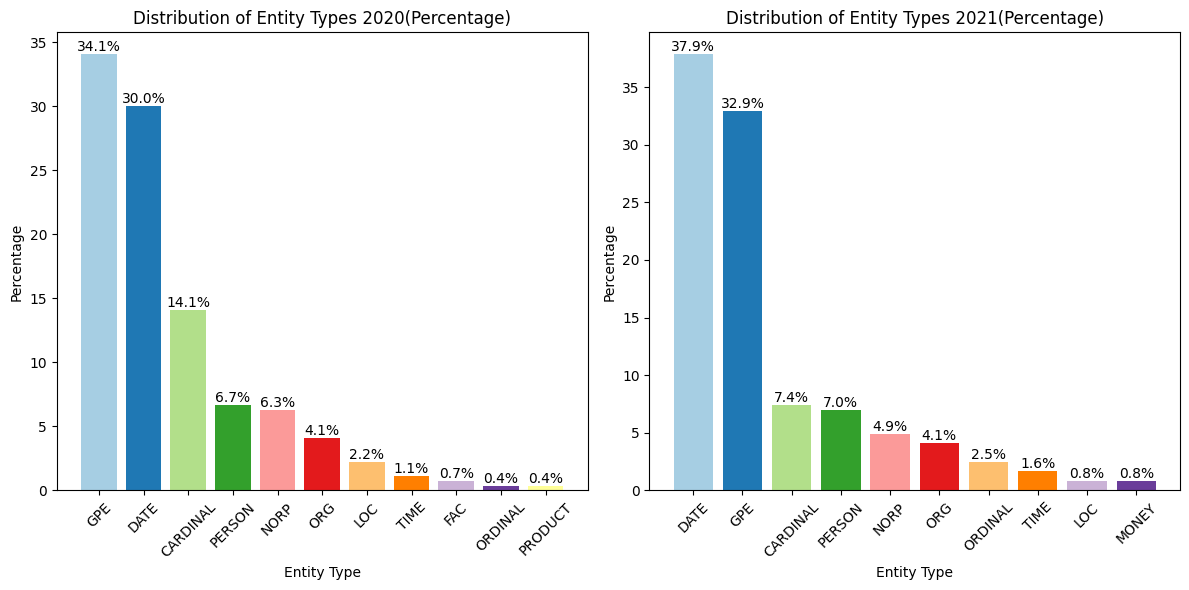

In [ ]:
# Create a bar chart for the distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
bars = ax[0].bar(sorted_entity_types, sorted_percentages, color=plt.cm.Paired(range(len(sorted_entity_types))))
bars2 = ax[1].bar(sorted_entity_types2, sorted_percentages2, color=plt.cm.Paired(range(len(sorted_entity_types2))))

# Add data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}%', ha='center', va='bottom')

# Add data labels on top of the bars
for bar2 in bars2:
    yval2 = bar2.get_height()
    ax[1].text(bar2.get_x() + bar2.get_width() / 2, yval2, f'{yval2:.1f}%', ha='center', va='bottom')

ax[0].set_xlabel('Entity Type')
ax[0].set_ylabel('Percentage')
ax[0].set_title('Distribution of Entity Types 2020(Percentage)')
ax[0].tick_params(axis='x', rotation=45)

ax[1].set_xlabel('Entity Type')
ax[1].set_ylabel('Percentage')
ax[1].set_title('Distribution of Entity Types 2021(Percentage)')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Interpretations**
- Specific dates, time periods, and events will remain a prominent aspect of PM's 15 August speeches.

- The high percentage of GPE entities suggests that the speech might discuss various places, nations, or locations.

- Cardinal numbers suggests that numerical figures, statistics, or counts might be emphasized in the speech.

- NORP entities indicates references to nationalities, religious groups, political affiliations, or similar categories. This could suggest discussions about diversity, unity, or identity.

# **Topic Modeling**

In [ ]:
# Collect sentences from the speech of (2020)
sentences = [sent.text for sent in doc.sents]

# Preprocess text
texts = []
for sentence in sentences:
    sentence = sentence.lower()
    sentence = gensim.utils.simple_preprocess(sentence, deacc=True)  # Tokenization and lowercase
    texts.append(sentence)

# Create a dictionary and a corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Train the LDA model
lda_model = gensim.models.LdaModel(corpus, num_topics=5, alpha='auto', id2word=dictionary, passes=15)

# Print the topics
pprint(lda_model.print_topics())

[(0,
  '0.001*"india" + 0.001*"country" + 0.001*"world" + 0.001*"today" + '
  '0.001*"selfreliant" + 0.001*"one" + 0.001*"year" + 0.001*"new" + '
  '0.001*"work" + 0.001*"dear"'),
 (1,
  '0.033*"india" + 0.020*"world" + 0.013*"country" + 0.010*"many" + '
  '0.010*"selfreliant" + 0.008*"today" + 0.008*"freedom" + 0.007*"countryman" '
  '+ 0.007*"one" + 0.006*"year"'),
 (2,
  '0.017*"india" + 0.015*"country" + 0.009*"new" + 0.009*"today" + '
  '0.008*"year" + 0.007*"one" + 0.006*"dear" + 0.006*"countryman" + '
  '0.006*"every" + 0.006*"get"'),
 (3,
  '0.001*"india" + 0.001*"world" + 0.001*"country" + 0.001*"countryman" + '
  '0.001*"year" + 0.001*"today" + 0.001*"one" + 0.001*"get" + 0.001*"new" + '
  '0.001*"selfreliant"'),
 (4,
  '0.014*"infrastructure" + 0.011*"work" + 0.011*"road" + 0.009*"new" + '
  '0.007*"country" + 0.007*"sector" + 0.007*"give" + 0.007*"port" + '
  '0.006*"towards" + 0.006*"project"')]


**Topic 0:**
- Top Words: india, world, selfreliant, many, country, freedom, today, countrymen, new, need.

- Interpretation: This topic seems to be discussing India's global presence, self-reliance, and the importance of freedom and development. It also mentions the country's need for progress.

**Topic 1:**
- Top Words: india, country, new, world, today, selfreliant, countrymen, dear, one, every.

- Interpretation: This topic might discuss India's identity, its relationship with the world, and the theme of self-reliance. There is also mention of corona which means there may be few discussion or precaution related talks for the pandemic.

**Topic 2:**
- Top Words: india, must, best, new, would, year, areas, border, bharat, jai.

- Interpretation: This topic could be related to the aspirations and goals for India's progress and . It mentions the need to excel in various areas and expresses patriotism with phrases like "bharat" and "jai".

**Topic 3:**
- Top Words: india, new, world, country, today, one, selfreliant, countrymen, get, need

- Interpretation: This topic may discuss India's pursuit of progress and self-reliance on the global stage. It emphasizes the need for development and growth.

**Topic 4:**
- Top Words: india, country, today, new, one, countrymen, dear, world, work, every

- Interpretation: This topic could focus on India's identity and aspirations. It mentions the audience as "countrymen" and "dear" and highlights the importance of work and progress.

In [ ]:
# Collect sentences from the speech of (2020)
sentences = [sent.text for sent in doc.sents]

# Preprocess text
texts = []
for sentence in sentences:
    sentence = sentence.lower()
    sentence = gensim.utils.simple_preprocess(sentence, deacc=True)  # Tokenization and lowercase
    texts.append(sentence)

# Create a dictionary and a corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Train the LDA model
lda_model = LdaMulticore(corpus, num_topics=10, id2word=dictionary, passes=15)

# Visualize the topics using pyLDAvis
lda_display = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_display)

In [ ]:
# Collect sentences from the speech of (2021)
sentences = [sent.text for sent in doc2.sents]

# Preprocess text
texts2 = []
for sentence in sentences:
    sentence = sentence.lower()
    sentence = gensim.utils.simple_preprocess(sentence, deacc=True)  # Tokenization and lowercase
    texts2.append(sentence)

# Create a dictionary and a corpus
dictionary = corpora.Dictionary(texts2)
corpus = [dictionary.doc2bow(text) for text in texts2]

# Train the LDA model
lda_model = LdaMulticore(corpus, num_topics=10, id2word=dictionary, passes=15)

# Visualize the topics using pyLDAvis
lda_display = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_display)


# **Distribution of Sentence length in speech**

In [ ]:
speech_text

"My dear countrymen, Congratulations and many best wishes to all the countrymen on this auspicious occasion of independence. Today, we are able to live in an independent India because of the sacrifices of millions of sons and daughters of Mother India. This is an occasion to pay tribute to the freedom fighters, martyrs and brave souls and their spirit and dedication to free Mother India. The valiant soldiers of our armed forces, our paramilitary forces, our police personnel and our security forces- everyone is engaged in protecting Mother India. They are engaged in safeguarding the common man. Today is the day to remember their sacrifices and penance sincerely and wholeheartedly. There is another name: Aurobindo Ghose. Today is the birth anniversary of Aurobindo Ghose, who tread the path from being a revolutionary to spirituality. Let us seek his blessings so that we can fulfil his as well as our vision. We are passing through an extraordinary situation. Today, children- the bright fut

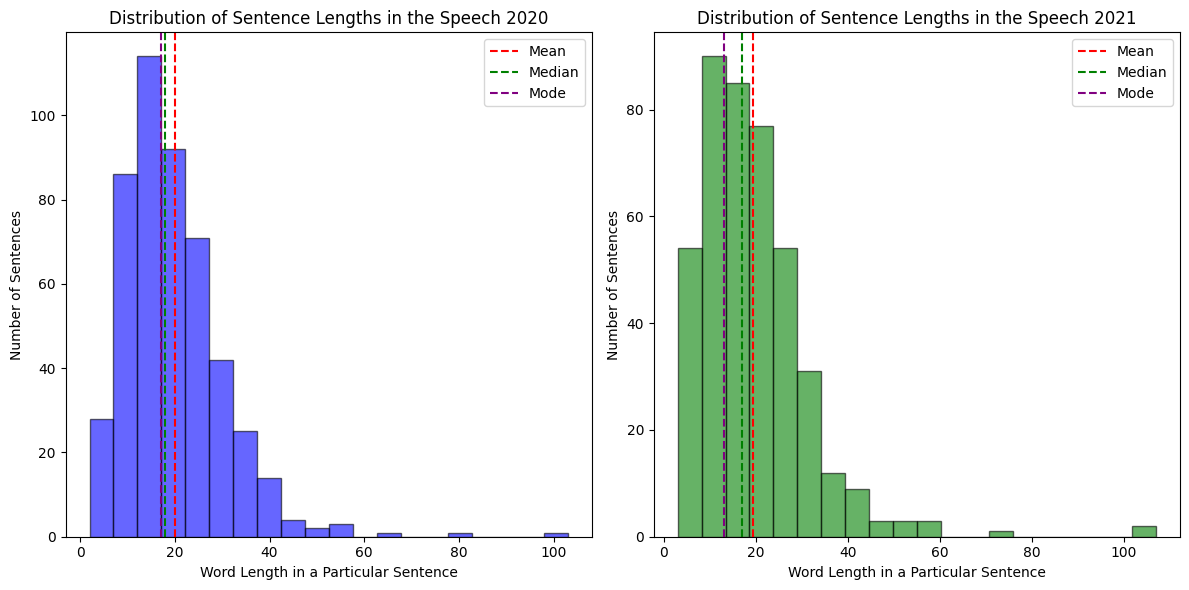

In [ ]:
# Process the text with spaCy
doc = nlp(speech_text)
doc2 = nlp(speech_text2)

# Calculate the words length in a sentence
sentence_lengths = [len(sent) for sent in doc.sents]
sentence_lengths2 = [len(sent2) for sent2 in doc2.sents]

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for 2020
hist_2020, bins_2020 = np.histogram(sentence_lengths, bins=20, density=True)
axs[0].hist(sentence_lengths, bins=20, color='blue', alpha=0.6, edgecolor='black')

mean_length_2020 = np.mean(sentence_lengths)
median_length_2020 = np.median(sentence_lengths)
mode_length_2020 = max(set(sentence_lengths), key=sentence_lengths.count)

axs[0].axvline(mean_length_2020, color='red', linestyle='dashed', label='Mean')
axs[0].axvline(median_length_2020, color='green', linestyle='dashed', label='Median')
axs[0].axvline(mode_length_2020, color='purple', linestyle='dashed', label='Mode')

axs[0].set_xlabel('Word Length in a Particular Sentence')
axs[0].set_ylabel('Number of Sentences')
axs[0].set_title('Distribution of Sentence Lengths in the Speech 2020')
axs[0].legend()

# Plot for 2021
hist_2021, bins_2021 = np.histogram(sentence_lengths2, bins=20, density=True)
axs[1].hist(sentence_lengths2, bins=20, color='green', alpha=0.6, edgecolor='black')

mean_length_2021 = np.mean(sentence_lengths2)
median_length_2021 = np.median(sentence_lengths2)
mode_length_2021 = max(set(sentence_lengths2), key=sentence_lengths2.count)

axs[1].axvline(mean_length_2021, color='red', linestyle='dashed', label='Mean')
axs[1].axvline(median_length_2021, color='green', linestyle='dashed', label='Median')
axs[1].axvline(mode_length_2021, color='purple', linestyle='dashed', label='Mode')

axs[1].set_xlabel('Word Length in a Particular Sentence')
axs[1].set_ylabel('Number of Sentences')
axs[1].set_title('Distribution of Sentence Lengths in the Speech 2021')
axs[1].legend()

# Adjust layout and
plt.tight_layout()
plt.show()


**Interpretations for 2020**
- As distibution is rightly skewed(positive), it means there are few longer sentences.

- Mostly there are around 17 words in a sentence and average there are 20 words in a sentence of the overall speech.

- Speech is felt like formal and structured as overall there are more consistent sentence length and variablity is average.

- Longer sentences might be used for more complex ideas or elaboration, while shorter sentences might be used for emphasis or brevity.

Let's Dive deeper into Analysis of Sentences above length 35

In [ ]:
"""for sentence in doc.sents:
  if len(sentence) >= 35:
    print(sentence)"""

'for sentence in doc.sents:\n  if len(sentence) >= 35:\n    print(sentence)'

In [ ]:
# Preparing data for 2020 sentences above 35
sentences_above_35 = [sent.text for sent in doc.sents if len(sent) > 35]
sentences_above_35 = ' '.join(sentences_above_35)

# Preparing data for 2021 sentences above 35
sentences_above_35_2 = [sent.text for sent in doc2.sents if len(sent) > 35]
sentences_above_35_2 = ' '.join(sentences_above_35_2)

In [ ]:
# Clean the text
cleaned_sentence = clean_text(sentences_above_35) #2020
cleaned_sentence2 = clean_text(sentences_above_35_2) #2021

# Tokenize the cleaned text
sentences_above_35 = tokenize_and_remove_stopwords(cleaned_sentence) #2020
sentences_above_35_2 = tokenize_and_remove_stopwords(cleaned_sentence2) #2021

Analyzing Sentiments of Sentences above 35

In [ ]:
# For (2020)
# Join the tokenized words back into a single string
sentences_above_35_joined = ' '.join(sentences_above_35)

# Perform sentiment analysis on the combined text
sentiment_scores = analyzer.polarity_scores(sentences_above_35_joined)

# Determine the sentiment category based on the compound score
if sentiment_scores['compound'] >= 0.05:
    sentiment_category = 'Positive'
elif sentiment_scores['compound'] <= -0.05:
    sentiment_category = 'Negative'
else:
    sentiment_category = 'Neutral'

# Print the sentiment analysis results
print("Sentiment Scores for 2020:", sentiment_scores)

# Determine the sentiment category based on the highest score
max_score = max(sentiment_scores['neg'], sentiment_scores['neu'], sentiment_scores['pos'])

if max_score == sentiment_scores['neg']:
    sentiment_category = 'Negative'
elif max_score == sentiment_scores['neu']:
    sentiment_category = 'Neutral'
else:
    sentiment_category = 'Positive'

print("Overall Sentiment for 2020:", sentiment_category)

Sentiment Scores for 2020: {'neg': 0.082, 'neu': 0.693, 'pos': 0.225, 'compound': 0.9983}
Overall Sentiment for 2020: Neutral


In [ ]:
# For (2021)
# Join the tokenized words back into a single string
sentences_above_35_joined2 = ' '.join(sentences_above_35_2)

# Perform sentiment analysis on the combined text
sentiment_scores = analyzer.polarity_scores(sentences_above_35_joined2)

# Determine the sentiment category based on the compound score
if sentiment_scores['compound'] >= 0.05:
    sentiment_category = 'Positive'
elif sentiment_scores['compound'] <= -0.05:
    sentiment_category = 'Negative'
else:
    sentiment_category = 'Neutral'

# Print the sentiment analysis results
print("Sentiment Scores for 2021:", sentiment_scores)

# Determine the sentiment category based on the highest score
max_score = max(sentiment_scores['neg'], sentiment_scores['neu'], sentiment_scores['pos'])

if max_score == sentiment_scores['neg']:
    sentiment_category = 'Negative'
elif max_score == sentiment_scores['neu']:
    sentiment_category = 'Neutral'
else:
    sentiment_category = 'Positive'

print("Overall Sentiment for 2021:", sentiment_category)


Sentiment Scores for 2021: {'neg': 0.03, 'neu': 0.698, 'pos': 0.272, 'compound': 0.9995}
Overall Sentiment for 2021: Neutral


Positive Words in Sentences length above 35

In [ ]:
# Identify positive words for 2020
positive_words = [word for word in sentences_above_35 if analyzer.polarity_scores(word)['compound'] > 0.5]
print(positive_words)

['best', 'freedom', 'best', 'free', 'freedom', 'freedom', 'inspiration', 'confidence', 'free', 'free', 'best', 'free', 'free', 'peace', 'best', 'best', 'best']


- The presence of positive words like "peace," "freedom," and "inspiration" in longer sentences indicates a focus on positive values, ideals, and historical events which contributed in the freedom of the country.

- The use of positive words such as "free," "best," and "confidence" contributes to an uplifting and motivational tone in the speech. And words like free could indicate some free schemes or benefits for the people.

In [ ]:
# Identify positive words for 2021
positive_words = [word for word in sentences_above_35_2 if analyzer.polarity_scores(word)['compound'] > 0.5]
print(positive_words)

['freedom', 'freedom', 'brave', 'heroes', 'revered', 'freedom', 'freedom', 'great', 'praise', 'honour', 'free', 'magnificence', 'great', 'vibrant', 'celebrating', 'enthusiastically', 'freedom', 'inspire', 'trust', 'celebrating', 'confidence']


Negative Words in Sentences length above 35

In [ ]:
# Identify negative words for 2020
negative_words = [word for word in sentences_above_35 if analyzer.polarity_scores(word)['compound'] < -0.5]
print(negative_words)

['slavery', 'war', 'destructive', 'war', 'war', 'died', 'poorest', 'poverty', 'crisis']


- The analysis reveals that longer sentences in the speech prominently discuss societal challenges such as poverty, adversity, and historical conflicts. This highlights the our PM's intention to address issues that have an impact on the nation and its people.

- Words like "poverty," "poorest," and "crisis" indicate a focus on socioeconomic challenges.

In [ ]:
# Identify negative words for 2021
negative_words = [word for word in sentences_above_35_2 if analyzer.polarity_scores(word)['compound'] < -0.1]
print(negative_words)
len(negative_words)

['poor', 'infected', 'disputes', 'cutting', 'forget', 'arrest', 'lost', 'waste', 'struggle', 'drop']


10

---------------------------------------------------------------------------------------------------------THE END------------------------------------------------------------------------------------------------------------

# Doubt

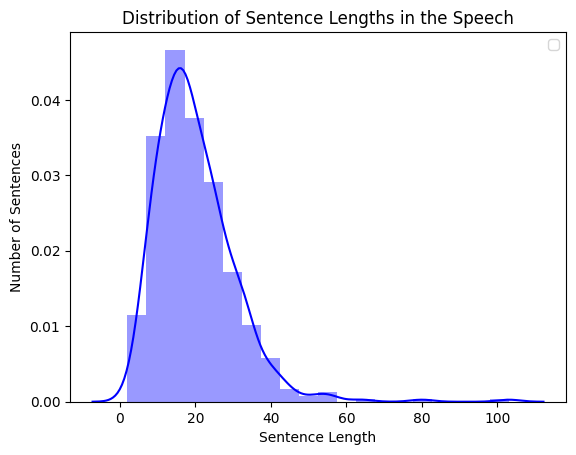

In [ ]:
import seaborn as sns
# Process the text with spaCy
doc = nlp(speech_text)

# Calculate sentence lengths
sentence_lengths = [len(sent) for sent in doc.sents]

# Create a histogram of sentence lengths
sns.distplot(sentence_lengths, bins=20, color='blue')

plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')
plt.title('Distribution of Sentence Lengths in the Speech')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
sentence_lengths

[20,
 25,
 26,
 27,
 9,
 14,
 8,
 20,
 17,
 8,
 15,
 2,
 8,
 31,
 38,
 32,
 34,
 14,
 34,
 7,
 9,
 16,
 21,
 13,
 14,
 9,
 9,
 17,
 28,
 6,
 19,
 22,
 38,
 31,
 38,
 7,
 12,
 12,
 3,
 25,
 25,
 18,
 25,
 16,
 29,
 29,
 13,
 28,
 22,
 24,
 25,
 41,
 16,
 35,
 38,
 21,
 12,
 20,
 6,
 42,
 21,
 13,
 20,
 22,
 49,
 16,
 34,
 13,
 11,
 41,
 13,
 16,
 25,
 16,
 8,
 13,
 22,
 17,
 15,
 18,
 10,
 14,
 6,
 10,
 24,
 10,
 29,
 11,
 22,
 8,
 30,
 13,
 15,
 11,
 18,
 5,
 17,
 24,
 12,
 35,
 22,
 31,
 11,
 9,
 21,
 16,
 21,
 24,
 22,
 33,
 21,
 18,
 23,
 12,
 19,
 18,
 21,
 30,
 23,
 12,
 32,
 15,
 11,
 28,
 23,
 16,
 17,
 4,
 11,
 15,
 9,
 29,
 35,
 19,
 22,
 21,
 31,
 19,
 55,
 20,
 19,
 22,
 15,
 18,
 10,
 12,
 29,
 17,
 24,
 17,
 40,
 16,
 9,
 18,
 22,
 14,
 11,
 14,
 20,
 33,
 17,
 9,
 24,
 13,
 23,
 22,
 8,
 7,
 29,
 35,
 14,
 8,
 22,
 15,
 8,
 10,
 19,
 16,
 40,
 11,
 7,
 34,
 19,
 28,
 103,
 25,
 17,
 64,
 29,
 9,
 15,
 15,
 54,
 41,
 24,
 12,
 12,
 24,
 45,
 56,
 13,
 18,
 19,
 34,
 25,
 7